# HW2: Going Outside (Graph Search) using Q-learning 

https://www.cnblogs.com/dragonir/p/6224313.html (Chinese & English from the original page)

Read Lecture Slides #19-#20 in `11_QLearn.pdf`

In [ ]:
'''
Name: Devson Butani
ID: 000732711
LTU Honor Code: "I pledge that on all academic work that I submit, I will 
neither give nor receive unauthorized aid, nor will I present another person's 
work as my own."
'''


import numpy as np
import random

gamma=0.8
Q=np.zeros([6,6])
R=np.array([[-1,-1,-1,-1,0,-1],  # 0
            [-1,-1,-1,0,-1,100], # 1
            [-1,-1,-1,0,-1,-1],  # 2
            [-1,0,0,-1,0,-1],    # 3
            [0,-1,-1,0,-1,100],  # 4
            [-1,0,-1,-1,0,100]]) # 5
print(np.array_str(R, precision=3))
print(R)

[[ -1  -1  -1  -1   0  -1]
 [ -1  -1  -1   0  -1 100]
 [ -1  -1  -1   0  -1  -1]
 [ -1   0   0  -1   0  -1]
 [  0  -1  -1   0  -1 100]
 [ -1   0  -1  -1   0 100]]
[[ -1  -1  -1  -1   0  -1]
 [ -1  -1  -1   0  -1 100]
 [ -1  -1  -1   0  -1  -1]
 [ -1   0   0  -1   0  -1]
 [  0  -1  -1   0  -1 100]
 [ -1   0  -1  -1   0 100]]


### Python review before begining the QL code

In [ ]:
# Python arrays review
print(R[2])
print(R[1][5]) 
print(R[1,5])
print(R[1,])
print(R[1, [4,5] ])

[-1 -1 -1  0 -1 -1]
100
100
[ -1  -1  -1   0  -1 100]
[ -1 100]


In [ ]:
# enumerate test: to get a index and the value from the iterable at the same time.
for index, value in enumerate(R[0]):
  print(index, value)

0 -1
1 -1
2 -1
3 -1
4 0
5 -1


In [ ]:
# Python review: to test int(np_array)
print(int(np.array([1]))) 

1


In [ ]:
# a is an array of integers.
a = np.array([1, 2, 3, 4, 5, 6])

print ('Indices of elements > 3:')
i = np.where(a>3)
print(i)
print(i[0])
b = a[i] # a[i[0]] also works
print(b)

Indices of elements > 3:
(array([3, 4, 5]),)
[3 4 5]
[4 5 6]


### QL code for building Q-table

In [ ]:
scores = []
for episode in range(900): #>> HOW MANY TIMES TO TRAIN RANDOM PATHS
  currSt = random.randint(0,5) # initial state for the episode. 0 and 5 both included
  #print(f"\n*****Current State = {currSt}")
  flag = 0 # to handle if initial currSt chosen at randome is 5.
           # without this, the last row of Q will be all zeros
  while flag == 0 or currSt != 5: #>> GO UNTILL OUTSIDE THE HOUSE (STATE 5) AFTER AT LEAST ONE LOOP
    flag = 1 
    nextSts_fr_currSt = []
    nextActs_fr_nextSt = []

    #>> FIND ALL POSSIBLE NEXT STATES FOR CURRENT STATE
    for index, value in enumerate(R[currSt]):
      if value != -1:
        nextSts_fr_currSt.append(index) #>> MAKES A 1-D ARRAY OF POSSIBLE STATES
    #print(f"possible actions (reachable states) from Current State = {nextSts_fr_currSt}")

    #>> SELECT ONE FROM ABOVE TO BE NEXT STATE
    nextSt = random.choice(np.array(nextSts_fr_currSt)) # choice(): we can get a random sample from 1Darray
    #print(f"chosen next action = {nextSt}")
    
    #>> FIND ALL POSSIBLE ACTIONS FROM NEXT STATE
    for index, value in enumerate(R[nextSt]):
      if value != -1:
        nextActs_fr_nextSt.append(index) #>> MAKES A 1-D ARRAY OF POSSIBLE ACTIONS
    #print(f"possible actions (reachable states) from next_st = {nextActs_fr_nextSt}")
    #print(f"  Before gamma*max: {Q[nextSt, nextActs_fr_nextSt]}")
    
    #>> FIND THE MAX YEILDING ACTION FROM ABOVE ARRAY AND ADJUST THE PATH TAKEN'S WORTH
    Q[currSt, nextSt] = R[currSt, nextSt] + gamma*max(Q[nextSt, nextActs_fr_nextSt]) # See sample code below to understand
    #Q[currSt, nextSt] =  gamma*max(R[currSt, nextSt] + Q[nextSt, nextActs_fr_nextSt])
    #print(f"  Updated: {Q[currSt, nextSt]}")
    
    #>> RUN IT AGAIN FOR THE NEW CURRENT STATE UNTILL GOAL STATE
    currSt = nextSt

  #>> MAKES A 1-D ARRAY OF CURRENT Q WITH RESPECT TO MAX(Q) UP TILL NOW
  #>> THIS ALLOWS LOGGING THE LEARNING CURVE FOR EACH EPISODE
  # to graph for each episode
  if (np.max(Q) > 0):
    scores.append(np.sum(Q/np.max(Q)*100))
  else:
    scores.append(0)

#>> RESULTING Q TABLE
print(np.array_str(Q, precision=1), end='\n\n')
#>> Q TABLE AS PERCENTAGE OF MAX(Q)
print(np.array_str(Q*100/np.max(Q), precision=0))

[[  0.   0.   0.   0. 400.   0.]
 [  0.   0.   0. 320.   0. 500.]
 [  0.   0.   0. 320.   0.   0.]
 [  0. 400. 256.   0. 400.   0.]
 [320.   0.   0. 320.   0. 500.]
 [  0. 400.   0.   0. 400. 500.]]

[[  0.   0.   0.   0.  80.   0.]
 [  0.   0.   0.  64.   0. 100.]
 [  0.   0.   0.  64.   0.   0.]
 [  0.  80.  51.   0.  80.   0.]
 [ 64.   0.   0.  64.   0. 100.]
 [  0.  80.   0.   0.  80. 100.]]


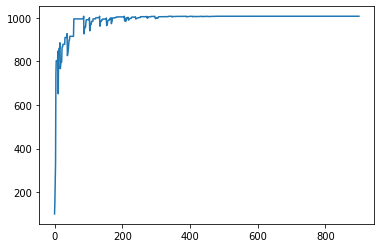

In [ ]:
import pylab as plt
plt.plot(scores)
plt.show()

### using the Q-table for testing (finding the best path)

In [ ]:
#>> ROUND Q TABLE TO 2 DECIMAL PLACES FOR FLOAT COMPARISONS
Q = np.round(Q,2)
# print(Q)

#>> SET STARTING POINT FOR PATH
currSt = 2
steps = [currSt]

while currSt != 5: #>> RUN UNTILL GOAL REACHED (STATE 5)
  
  # #>> FIND THE MAXIMUM YEILD FROM CURRENT STATE
  # max_q_for_currSt = max(Q[currSt])
  # nextSts_fr_currSt = []

  # #>> FIND POSSIBLE NEXT STATES THAT CAN ACHIEVE THE ABOVE YIELD
  # for index, value in enumerate(Q[currSt]):
  #   # print(index, value)
  #   if value == max_q_for_currSt:
  #     # print(index)
  #     nextSts_fr_currSt.append(index)

  # #>> CHOOSE ONE ACTION AS NEXT STATE
  # nextSt = random.choice(np.array(nextSts_fr_currSt))
  # print(f"Available choices: {nextSts_fr_currSt} --> Chose: {nextSt}")
  # steps.append(nextSt) #>> ADD THE STEP TAKEN TO OVERALL PATH
  # currSt = nextSt
  
  #>> ABOVE CODE BUT CONDENSED USING NUMPY
  # print(random.choice(np.array(np.where(Q[currSt] == max(Q[currSt]))[0])))
  nextSt = random.choice(np.array(np.where(Q[currSt] == max(Q[currSt]))[0]))
  steps.append(nextSt) #>> ADD THE STEP TAKEN TO OVERALL PATH
  currSt = nextSt

print(f"Most efficient path: {steps}")

Most efficient path: [2, 3, 1, 5]


#>> HW2 - Full code with QLearn() and test()


In [ ]:
import numpy as np
import random
import pylab as plt

#>> STARTING TABLES
R1 = np.array([[-1,-1,-1,-1,0,-1],  # 0 >> PEGHOTY'S HOUSE, Goal: 5
              [-1,-1,-1,0,-1,100],  # 1
              [-1,-1,-1,0,-1,-1],   # 2
              [-1,0,0,-1,0,-1],     # 3
              [0,-1,-1,0,-1,100],   # 4
              [-1,0,-1,-1,0,100]])  # 5
Q1 = np.zeros([6,6])

R2 = np.array([[-1,-1,-1,-1,-1,0,-1],     # 0 >> CHUNG'S HOUSE, Goal: 6
              [-1,-1,-1,-1,0, -1,100],    # 1
              [-1,-1,-1, 0,-1,-1,100],    # 2 
              [-1, -1, 0, -1, 0, -1, -1], # 3 
              [-1, 0, -1, 0, -1, 0, -1],  # 4 
              [ 0,-1,-1,-1, 0,-1,-1],     # 5 
              [-1, 0, 0, -1,-1,-1,100]])  # 6
Q2 = np.zeros([7,7])

#>> PERFORM Q-LEARNING AND GIVE OUT THE QUALITY TABLE
def QLearn(np_reward_table, np_quality_table, goal_state, training_range=900, gamma=0.8):
  np_quality_table = np.zeros_like(np_reward_table) #>> MAKE ZERO ARRAY WITH SAME SHAPE AS REWARD TABLE
  scores = [] #>> INIT EMPTY ARRAY TO KEEP TRACK OF LEARNING
  
  for episode in range(training_range): #>> HOW MANY TIMES TO TRAIN RANDOM PATHS
    currSt = random.randint(0,(np.shape(np_reward_table)[0] - 1)) #>> 0 to MAX STATE COUNT
    flag = 0 # to handle if initial currSt chosen at randome is 5.
  
    #>> GO UNTILL OUTSIDE THE HOUSE (GOAL STATE) AFTER AT LEAST ONE LOOP
    while flag == 0 or currSt != goal_state:
      flag = 1 
      nextSts_fr_currSt = []
      nextActs_fr_nextSt = []
      
      #>> FIND ALL POSSIBLE NEXT STATES FOR CURRENT STATE
      for index, value in enumerate(np_reward_table[currSt]):
        if value != -1:
          nextSts_fr_currSt.append(index) #>> MAKES A 1-D ARRAY OF POSSIBLE STATES
      
      #>> SELECT ONE FROM ABOVE TO BE NEXT STATE
      nextSt = random.choice(np.array(nextSts_fr_currSt)) # choice(): we can get a random sample from 1Darray
      
      #>> FIND ALL POSSIBLE ACTIONS FROM NEXT STATE
      for index, value in enumerate(np_reward_table[nextSt]):
        if value != -1:
          nextActs_fr_nextSt.append(index) #>> MAKES A 1-D ARRAY OF POSSIBLE ACTIONS
      
      #>> FIND THE MAX YEILDING ACTION FROM ABOVE ARRAY AND ADJUST THE PATH TO BE TAKEN'S WORTH
      np_quality_table[currSt, nextSt] = np_reward_table[currSt, nextSt] + gamma*max(np_quality_table[nextSt, nextActs_fr_nextSt])
      #>> RUN IT AGAIN FOR THE NEW CURRENT STATE UNTIL GOAL STATE
      currSt = nextSt
  
    #>> MAKES A 1-D ARRAY OF CURRENT Q WITH RESPECT TO MAX(Q) UP TILL NOW. THIS ALLOWS GRAPHING THE LEARNING CURVE FOR EACH EPISODE
    if (np.max(np_quality_table) > 0):
      scores.append(np.sum(np_quality_table/np.max(np_quality_table)*100))
    else:
      scores.append(0)

  #>> RESULTING RAW Q TABLE
  # print(np.array_str(np_quality_table, precision=1), end='\n\n')
  #>> Q TABLE AS PERCENTAGE OF MAX(Q) - ROUNDED AFTER PERCENTAGE
  np_quality_table = np.round((np_quality_table*100/np.max(np_quality_table))) #>> ROUNDING PRECESION CAN BE CHANGED DEPENDING ON APPLICATION
  print(f"Quality Table = ")
  print(f"{np_quality_table}")
  
  #>> PLOT THE LEARNING CURVE USING SCORES GATHERED FOR EVERY TRAINING EPISODE
  plt.plot(scores)
  plt.show()

  return np_quality_table

#>> FIND THE BEST PATH FROM ALL STATES USING THE INPUT QUALITY TABLE
def test(np_quality_table, goal_state):
  for starting_point in range(np.shape(np_quality_table)[0] - 1):
  #>> SET STARTING POINT FOR PATH
    currSt = starting_point
    steps = [currSt]
    while currSt != goal_state: #>> RUN UNTILL GOAL REACHED
      nextSt = random.choice(np.array(np.where(np_quality_table[currSt] == max(np_quality_table[currSt]))[0]))
      steps.append(nextSt) #>> ADD THE STEP TAKEN TO OVERALL PATH
      currSt = nextSt
    print(f"Most efficient path: {steps}") #>> PRINT THE COMPLETE PATH ONCE GOAL REACHED

# Main Code:

---------------------Peghoty's House---------------------
Quality Table = 
[[  0.   0.   0.   0.  80.   0.]
 [  0.   0.   0.  64.   0. 100.]
 [  0.   0.   0.  64.   0.   0.]
 [  0.  80.  51.   0.  80.   0.]
 [ 64.   0.   0.  64.   0. 100.]
 [  0.  80.   0.   0.  80. 100.]]


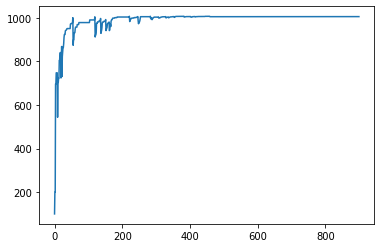

Most efficient path: [0, 4, 5]
Most efficient path: [1, 5]
Most efficient path: [2, 3, 1, 5]
Most efficient path: [3, 1, 5]
Most efficient path: [4, 5]
---------------------Chung's House---------------------
Quality Table = 
[[  0.   0.   0.   0.   0.  51.   0.]
 [  0.   0.   0.   0.  64.   0. 100.]
 [  0.   0.   0.  64.   0.   0. 100.]
 [  0.   0.  80.   0.  64.   0.   0.]
 [  0.  80.   0.  64.   0.  51.   0.]
 [ 41.   0.   0.   0.  64.   0.   0.]
 [  0.  80.  80.   0.   0.   0. 100.]]


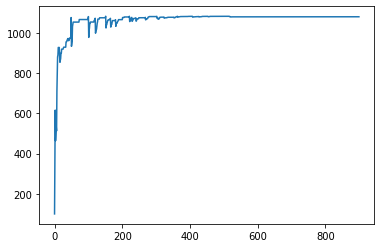

Most efficient path: [0, 5, 4, 1, 6]
Most efficient path: [1, 6]
Most efficient path: [2, 6]
Most efficient path: [3, 2, 6]
Most efficient path: [4, 1, 6]
Most efficient path: [5, 4, 1, 6]


In [ ]:
print("---------------------Peghoty's House---------------------")
Q1 = QLearn(R1,Q1,5)
test(Q1,5)

print("---------------------Chung's House---------------------")
Q2 = QLearn(R2,Q2,6)
test(Q2,6)